In [1]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [2]:
#importing the dataset
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Getting all the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [4]:
x = data[['SepalLengthCm','SepalWidthCm',	'PetalLengthCm','PetalWidthCm']]
y = data['Species']

In [5]:
x = x.values
y = y.values

In [6]:
from sklearn.cluster import KMeans
loss = []
for i in range(1,15):
    kmodel=KMeans(n_clusters=i)
    kmodel.fit(x)

    loss.append(kmodel.inertia_)

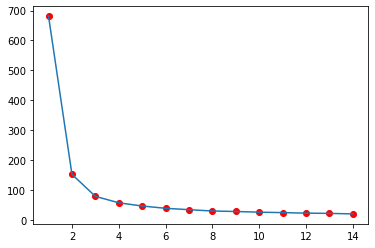

In [9]:
plt.scatter(range(1,15),loss,c='r')
plt.plot(range(1,15),loss)
plt.show()

In [10]:
# Applying K means algorithm with optimum no. of clusters
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(x)

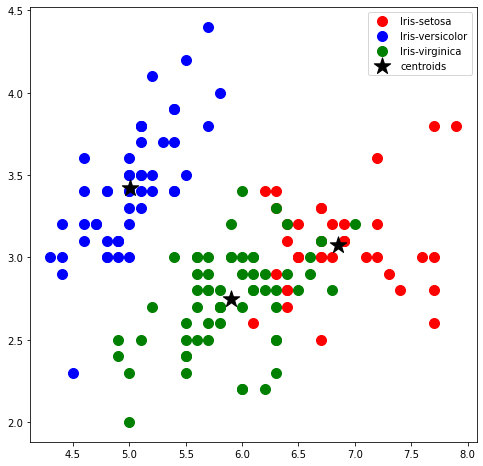

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa') 
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolor') 
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica') 

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',s=300,c='black',label='centroids') 
                                    
plt.legend()
plt.show()